# Pandas (continues)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Catenating datasets

In [2]:
# axis = 0 catenates vertically and axis = 1 catenates horizontally. 
# pandas dataframe works similarly but row indices and the column names require extra attention.
# also the difference between np.concatenate & pd.concat
## helper for creating dataframes
def makedf(cols, ind):
    data = {c : [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

In [3]:
a=makedf("AB", [0,1])
a

,A,B
0,A0,B0
1,A1,B1


In [4]:
b=makedf("AB", [2,3])
b

,A,B
2,A2,B2
3,A3,B3


In [5]:
c=makedf("CD", [0,1])
c

,C,D
0,C0,D0
1,C1,D1


In [6]:
d=makedf("BC", [2,3])
d

,B,C
2,B2,C2
3,B3,C3


In [7]:
## concat a and b -- works as expected
pd.concat([a,b])   # The default axis is 0

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [8]:
r=pd.concat([a,a])
r

,A,B
0,A0,B0
1,A1,B1
0,A0,B0
1,A1,B1


In [9]:
r.loc[0,"A"]

0    A0
0    A0
Name: A, dtype: object

In [10]:
## indices should be unique, so that's not what we aim to. 
## here's a tool to chek duplicated indices
try:
    pd.concat([a,a], verify_integrity=True)
except ValueError as e:
    import sys
    print(e, file=sys.stderr)

Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [11]:
## automatic renumbering of rows
pd.concat([a,a], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A0,B0
3,A1,B1


In [12]:
## hierarchical indexing -- multiple level indices
r2=pd.concat([a,a], keys=['first', 'second'])
r2

A   B
first  0  A0  B0
       1  A1  B1
second 0  A0  B0
       1  A1  B1

In [13]:
r2["A"]["first"][0] # works as numpy

'A0'

In [14]:
## it works similarly with horizontal catenation
pd.concat([a,c], axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [15]:
## if you concatenate vertically two DataFrames that don't have the same columns
## this is called outer join, considers all the columns (the common ones and the different ones)
pd.concat([a,d], sort=False)    # sort option is used to silence a deprecation message

,A,B,C
0,A0,B0,NaN
1,A1,B1,NaN
2,NaN,B2,C2
3,NaN,B3,C3


In [16]:
## here is the same catenation but with inner join
pd.concat([a,d], join="inner")

,B
0,B0
1,B1
2,B2
3,B3


In [17]:
## exercose 01 (split date continues)
#url = "https://raw.githubusercontent.com/annassanchez/HY-2021-DataScience/main/week04/Helsingin_pyorailijamaarat.csv"
#kk = pd.read_csv(url, sep = ';', header = 0)

def split_date(df):
    df = df.dropna(axis=0, how='all')
    df = df.dropna(axis=1, how='all')
    df[["Weekday", "Day", "Month", "Year", "Hour"]] = df['Päivämäärä'].str.split(expand=True)
    df[["Weekday"]] = df[["Weekday"]].replace({"ma": "Mon", "ti": "Tue", "ke": "Wed", "to": "Thu", 
        "pe": "Fri", "la": "Sat", "su": "Sun"})
    df[["Month"]] = df[["Month"]].replace({"tammi": "1", "helmi": "2", "maalis": "3", "huhti": "4", 
        "touko": "5", "kesä": "6", "heinä": "7", "elo": "8", "syys": "9", "loka": "10", "marras": "11",
        "joulu": "12"})
    df["Hour"] = df["Hour"].str.split(":", expand=True)[0].map(int)
    df['Päivämäärä'] = df["Weekday"] + " " + df["Day"] + " " + df["Month"] + " " + df["Year"] + " " + df["Hour"].map(str)
    df = df[df.columns.tolist()[-5:] + [df.columns.tolist()[0]]]
    return df.astype({"Weekday":object, "Day":int,  "Month":int, "Year":int, "Hour": int})

In [18]:
def split_date_continues():
    #d = split_date()
    url = "https://raw.githubusercontent.com/annassanchez/HY-2021-DataScience/main/week04/Helsingin_pyorailijamaarat.csv"
    data = pd.read_csv(url, sep = ';', header = 0)
    d = split_date(data)
    data = data.dropna(axis=0, how='all')
    data = data.dropna(axis=1, how='all')
    #data.drop(['Päivämäärä'], inplace = True, axis = 1)
    final = pd.concat([d, data], axis = 1)
    final.drop([final.columns.tolist()[5]],inplace = True, axis = 1)
    return final#.astype({"Weekday":object, "Day":np.int32,  "Month":np.int32, "Year":np.int32, "Hour": float})


In [19]:
url = "https://raw.githubusercontent.com/annassanchez/HY-2021-DataScience/main/week04/Helsingin_pyorailijamaarat.csv"
df = pd.read_csv(url, sep = ';', header = 0)
split_date(df)

,Weekday,Day,Month,Year,Hour,Päivämäärä
0,Wed,1,1,2014,0,Wed 1 1 2014 0
1,Wed,1,1,2014,1,Wed 1 1 2014 1
2,Wed,1,1,2014,2,Wed 1 1 2014 2
3,Wed,1,1,2014,3,Wed 1 1 2014 3
4,Wed,1,1,2014,4,Wed 1 1 2014 4
...,...,...,...,...,...,...
37123,Tue,27,3,2018,19,Tue 27 3 2018 19
37124,Tue,27,3,2018,20,Tue 27 3 2018 20
37125,Tue,27,3,2018,21,Tue 27 3 2018 21
37126,Tue,27,3,2018,22,Tue 27 3 2018 22


In [20]:
df = split_date_continues()
print("Shape:", df.shape)
print("Column names:\n", df.columns)
print(df.head())

Shape: (37128, 25)
Column names:
 Index(['Weekday', 'Day', 'Month', 'Year', 'Hour', 'Auroransilta',
       'Eteläesplanadi', 'Huopalahti (asema)', 'Kaisaniemi/Eläintarhanlahti',
       'Kaivokatu', 'Kulosaaren silta et.', 'Kulosaaren silta po. ',
       'Kuusisaarentie', 'Käpylä, Pohjoisbaana',
       'Lauttasaaren silta eteläpuoli', 'Merikannontie',
       'Munkkiniemen silta eteläpuoli', 'Munkkiniemi silta pohjoispuoli',
       'Heperian puisto/Ooppera', 'Pitkäsilta itäpuoli',
       'Pitkäsilta länsipuoli', 'Lauttasaaren silta pohjoispuoli',
       'Ratapihantie', 'Viikintie', 'Baana'],
      dtype='object')
  Weekday  Day  Month  ...  Ratapihantie  Viikintie  Baana
0     Wed    1      1  ...           NaN        NaN    8.0
1     Wed    1      1  ...           NaN        NaN    4.0
2     Wed    1      1  ...           NaN        NaN   11.0
3     Wed    1      1  ...           NaN        NaN    3.0
4     Wed    1      1  ...           NaN        NaN    4.0

[5 rows x 25 columns]


In [21]:
## alternative solution
days = dict(zip("ma ti ke to pe la su".split(), "Mon Tue Wed Thu Fri Sat Sun".split()))
months = dict(zip("tammi helmi maalis huhti touko kesä heinä elo syys loka marras joulu".split(), range(1, 13)))

def split_date(df):
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]
    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:, 0]
    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d
def split_date_continues():
    url = "https://raw.githubusercontent.com/annassanchez/HY-2021-DataScience/main/week04/Helsingin_pyorailijamaarat.csv"
    df = pd.read_csv(url, sep = ';', header = 0)
    df = df.dropna(axis=0, how="all").dropna(axis=1, how="all")
    d = split_date(df)
    df = df.drop("Päivämäärä", axis=1)
    result = pd.concat([d, df], axis=1)
    return result


df = split_date_continues()
print("Shape:", df.shape)
print("Column names:\n", df.columns)
print(df.head())

Shape: (37128, 25)
Column names:
 Index(['Weekday', 'Day', 'Month', 'Year', 'Hour', 'Auroransilta',
       'Eteläesplanadi', 'Huopalahti (asema)', 'Kaisaniemi/Eläintarhanlahti',
       'Kaivokatu', 'Kulosaaren silta et.', 'Kulosaaren silta po. ',
       'Kuusisaarentie', 'Käpylä, Pohjoisbaana',
       'Lauttasaaren silta eteläpuoli', 'Merikannontie',
       'Munkkiniemen silta eteläpuoli', 'Munkkiniemi silta pohjoispuoli',
       'Heperian puisto/Ooppera', 'Pitkäsilta itäpuoli',
       'Pitkäsilta länsipuoli', 'Lauttasaaren silta pohjoispuoli',
       'Ratapihantie', 'Viikintie', 'Baana'],
      dtype='object')
  Weekday  Day  Month  ...  Ratapihantie  Viikintie  Baana
0     Wed    1      1  ...           NaN        NaN    8.0
1     Wed    1      1  ...           NaN        NaN    4.0
2     Wed    1      1  ...           NaN        NaN   11.0
3     Wed    1      1  ...           NaN        NaN    3.0
4     Wed    1      1  ...           NaN        NaN    4.0

[5 rows x 25 columns]


##Merging dataframes

In [22]:
## original dataframe with the wages and ages
df = pd.DataFrame([[1000, "Jack", 21], [1500, "John", 29]], columns=["Wage", "Name", "Age"])
df

,Wage,Name,Age
0,1000,Jack,21
1,1500,John,29


In [23]:
## occupations of persons
df2 = pd.DataFrame({"Name" : ["John", "Jack"], "Occupation": ["Plumber", "Carpenter"]})
df2

,Name,Occupation
0,John,Plumber
1,Jack,Carpenter


In [24]:
# merge joins two dataframes based on a common field and will keep the indices aligned
pd.merge(df, df2)

,Wage,Name,Age,Occupation
0,1000,Jack,21,Carpenter
1,1500,John,29,Plumber


In [25]:
## sometimes not all the keys appear in both dataframes:
df3 = pd.concat([df2, pd.DataFrame({ "Name" : ["James"], "Occupation":["Painter"]})], ignore_index=True)
df3

,Name,Occupation
0,John,Plumber
1,Jack,Carpenter
2,James,Painter


In [26]:
## when merging, only joins the common index
pd.merge(df, df3)                # By default an inner join is computed

,Wage,Name,Age,Occupation
0,1000,Jack,21,Carpenter
1,1500,John,29,Plumber


In [27]:
pd.merge(df, df3, how="outer")   # Outer join

,Wage,Name,Age,Occupation
0,1000.0,Jack,21.0,Carpenter
1,1500.0,John,29.0,Plumber
2,NaN,James,NaN,Painter


In [28]:
## one-to-many relationship is also possible on merges
books = pd.DataFrame({"Title" : ["War and Peace", "Good Omens", "Good Omens"] ,
                      "Author" : ["Tolstoi", "Terry Pratchett", "Neil Gaiman"]})
books

,Title,Author
0,War and Peace,Tolstoi
1,Good Omens,Terry Pratchett
2,Good Omens,Neil Gaiman


In [29]:
collections = pd.DataFrame([["Oodi", "War and Peace"],
                           ["Oodi", "Good Omens"],
                           ["Pasila", "Good Omens"],
                           ["Kallio", "War and Peace"]], columns=["Library", "Title"])
collections

,Library,Title
0,Oodi,War and Peace
1,Oodi,Good Omens
2,Pasila,Good Omens
3,Kallio,War and Peace


In [30]:
libraries_with_books_by = pd.merge(books, collections)
libraries_with_books_by

,Title,Author,Library
0,War and Peace,Tolstoi,Oodi
1,War and Peace,Tolstoi,Kallio
2,Good Omens,Terry Pratchett,Oodi
3,Good Omens,Terry Pratchett,Pasila
4,Good Omens,Neil Gaiman,Oodi
5,Good Omens,Neil Gaiman,Pasila


In [31]:
## exercise 02: cycling weather
def cycling_weather():
  url_weather = 'https://raw.githubusercontent.com/annassanchez/HY-2021-DataScience/main/week05/kumpula-weather-2017.csv'
  url_cycling = 'https://raw.githubusercontent.com/annassanchez/HY-2021-DataScience/main/week05/Helsingin_pyorailijamaarat.csv'
  df_weather = pd.read_csv(url_weather, sep=',')
  df_cycling = pd.read_csv(url_cycling, sep=';')
  df_cycling = df_cycling.dropna(axis=0, how="all").dropna(axis=1, how="all")
  df_cycling[["Weekday", "Day", "Month", "Year", "Hour"]] = df_cycling['Päivämäärä'].str.split(expand=True)
  df_cycling[["Month"]] = df_cycling[["Month"]].replace({"tammi": "1", "helmi": "2", "maalis": "3", 
                                                          "huhti": "4", "touko": "5", "kesä": "6", 
                                                          "heinä": "7", "elo": "8", "syys": "9", 
                                                          "loka": "10", "marras": "11", "joulu": "12"})
  df_cycling = df_cycling.astype({"Weekday": object, "Day": int, "Month": int, "Year": int})
  df_cyc_weat = pd.merge(df_weather, df_cycling, left_on=['d', 'm', 'Year'], 
                          right_on=["Day", "Month", "Year"])
  df_cyc_weat.drop(['m', 'd', 'Time', 'Time zone', 'Päivämäärä'], inplace=True, axis = 1)
  return df_cyc_weat

In [32]:
cycling_weather()

,Year,Precipitation amount (mm),Snow depth (cm),Air temperature (degC),Auroransilta,Eteläesplanadi,Huopalahti (asema),Kaisaniemi/Eläintarhanlahti,Kaivokatu,Kulosaaren silta et.,Kulosaaren silta po.,Kuusisaarentie,"Käpylä, Pohjoisbaana",Lauttasaaren silta eteläpuoli,Merikannontie,Munkkiniemen silta eteläpuoli,Munkkiniemi silta pohjoispuoli,Heperian puisto/Ooppera,Pitkäsilta itäpuoli,Pitkäsilta länsipuoli,Lauttasaaren silta pohjoispuoli,Ratapihantie,Viikintie,Baana,Weekday,Day,Month,Hour
0,2017,-1.0,-1.0,0.6,NaN,11.0,8.0,14.0,NaN,0.0,10.0,2.0,NaN,21.0,8.0,10.0,4.0,22.0,19.0,14.0,15.0,8.0,NaN,13.0,su,1,1,00:00
1,2017,-1.0,-1.0,0.6,NaN,3.0,3.0,8.0,NaN,0.0,8.0,5.0,NaN,7.0,5.0,4.0,3.0,12.0,5.0,12.0,17.0,1.0,NaN,2.0,su,1,1,01:00
2,2017,-1.0,-1.0,0.6,NaN,2.0,5.0,5.0,NaN,0.0,2.0,3.0,NaN,6.0,5.0,4.0,4.0,4.0,5.0,6.0,5.0,5.0,NaN,3.0,su,1,1,02:00
3,2017,-1.0,-1.0,0.6,NaN,2.0,1.0,0.0,NaN,0.0,0.0,2.0,NaN,6.0,0.0,2.0,0.0,6.0,6.0,10.0,0.0,1.0,NaN,7.0,su,1,1,03:00
4,2017,-1.0,-1.0,0.6,NaN,1.0,0.0,2.0,NaN,0.0,1.0,1.0,NaN,1.0,0.0,1.0,1.0,7.0,1.0,6.0,1.0,0.0,NaN,3.0,su,1,1,04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2017,3.2,-1.0,1.6,2.0,3.0,3.0,4.0,10.0,0.0,8.0,4.0,5.0,10.0,8.0,4.0,3.0,3.0,13.0,10.0,1.0,4.0,5.0,11.0,su,31,12,19:00
8756,2017,3.2,-1.0,1.6,2.0,5.0,3.0,3.0,10.0,0.0,6.0,4.0,0.0,6.0,5.0,6.0,4.0,8.0,9.0,7.0,3.0,4.0,1.0,5.0,su,31,12,20:00
8757,2017,3.2,-1.0,1.6,4.0,7.0,1.0,4.0,11.0,0.0,5.0,0.0,2.0,6.0,4.0,4.0,2.0,7.0,6.0,4.0,2.0,5.0,0.0,8.0,su,31,12,21:00
8758,2017,3.2,-1.0,1.6,1.0,7.0,1.0,4.0,15.0,0.0,3.0,0.0,4.0,4.0,7.0,4.0,3.0,17.0,4.0,8.0,2.0,2.0,3.0,8.0,su,31,12,22:00


In [33]:
## alternative solution
days = dict(zip("ma ti ke to pe la su".split(), "Mon Tue Wed Thu Fri Sat Sun".split()))
months = dict(zip("tammi helmi maalis huhti touko kesä heinä elo syys loka marras joulu".split(), range(1, 13)))

def split_date(df):
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]
    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:, 0]
    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d
def split_date_continues():
    df = pd.read_csv("src/Helsingin_pyorailijamaarat.csv", sep=";")
    df = df.dropna(axis=0, how="all").dropna(axis=1, how="all")
    d = split_date(df)
    df = df.drop("Päivämäärä", axis=1)
    return pd.concat([d, df], axis=1)
def cycling_weather():
    wh = pd.read_csv("src/kumpula-weather-2017.csv")
    bike = split_date_continues()
    result = pd.merge(wh, bike, left_on=["Year", "m", "d"], right_on=["Year", "Month", "Day"])
    return result.drop(['m', 'd', 'Time', 'Time zone'], axis=1)

In [34]:
## exercise 03: top hands
def top_bands():
  url_top40 = 'https://raw.githubusercontent.com/annassanchez/HY-2021-DataScience/main/week05/UK-top40-1964-1-2.tsv'
  url_bands = 'https://raw.githubusercontent.com/annassanchez/HY-2021-DataScience/main/week05/bands.tsv'
  df_top40 = pd.read_csv(url_top40, sep='\t')
  df_top40['Artist'] = df_top40['Artist'].str.title()
  df_bands = pd.read_csv(url_bands, sep='\t')
  df_topBands = pd.merge(df_top40, df_bands, left_on='Artist', right_on='Band', how = 'right')
  return df_topBands

In [35]:
top_bands().shape

(9, 13)

In [36]:
## alternative solution
def top_bands():
    top40 = pd.read_csv("src/UK-top40-1964-1-2.tsv", sep="\t")
    bands = pd.read_csv("src/bands.tsv", sep="\t")
    bands["Band"] = bands["Band"].str.upper()
    result = pd.merge(top40, bands, left_on="Artist", right_on="Band")
    return result 

## Aggregates and groupings

In [37]:
wh = pd.read_csv("https://raw.githubusercontent.com/csmastersUH/data_analysis_with_python_2020/master/kumpula-weather-2017.csv")

In [38]:
## rename method -- renames the columns of a DataFrame
wh3 = wh.rename(columns={"m": "Month", "d": "Day", "Precipitation amount (mm)" : "Precipitation",
                         "Snow depth (cm)" : "Snow", "Air temperature (degC)" : "Temperature"})
wh3.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8


In [39]:
## the groupby mehtod splits the dataframe into groups -- for example, you can add from months
groups = wh3.groupby("Month")
groups

In [40]:
len(groups)

12

In [41]:
for key, group in groups:
    print(key, len(group))

1 31
2 28
3 31
4 30
5 31
6 30
7 31
8 31
9 30
10 31
11 30
12 31


In [42]:
groups.get_group(2)                 # Group with index two is February

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
31,2017,2,1,00:00,UTC,1.5,4.0,-0.6
32,2017,2,2,00:00,UTC,0.2,5.0,-0.8
33,2017,2,3,00:00,UTC,-1.0,6.0,-0.2
34,2017,2,4,00:00,UTC,2.7,6.0,0.4
35,2017,2,5,00:00,UTC,-1.0,7.0,-2.5
36,2017,2,6,00:00,UTC,-1.0,7.0,-7.3
37,2017,2,7,00:00,UTC,-1.0,8.0,-12.1
38,2017,2,8,00:00,UTC,-1.0,8.0,-8.8
39,2017,2,9,00:00,UTC,-1.0,8.0,-10.1
40,2017,2,10,00:00,UTC,-1.0,8.0,-8.3


In [43]:
## groupby object works like a df, so some operations are allowed, as subsetting:
groups["Temperature"]

In [44]:
## also aggregation methods are normally included
## the mean aggregation was performed on each group, and the results wer automatically combined
groups["Temperature"].mean()

Month
1     -2.316129
2     -2.389286
3      0.983871
4      2.676667
5      9.783871
6     13.726667
7     16.035484
8     16.183871
9     11.826667
10     5.454839
11     3.950000
12     1.741935
Name: Temperature, dtype: float64

In [45]:
## let's try with other aggregation
groups["Precipitation"].sum()

Month
1      26.9
2      21.0
3      29.7
4      26.9
5      -5.9
6      59.3
7      14.2
8      70.1
9      51.2
10    173.5
11    117.2
12    133.6
Name: Precipitation, dtype: float64

In [46]:
## the negative precipitation values are causing trouble
## make them 0
wh4 = wh3.copy()
wh4.loc[wh4.Precipitation == -1, "Precipitation"] = 0
wh4.loc[wh4.Snow == -1, "Snow"] = 0
wh4.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
0,2017,1,1,00:00,UTC,0.0,0.0,0.6
1,2017,1,2,00:00,UTC,4.4,0.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,0.0,13.0,-12.8
4,2017,1,5,00:00,UTC,0.0,10.0,-17.8


In [47]:
wh4.groupby("Month")["Precipitation"].sum()

Month
1      38.9
2      35.0
3      41.7
4      39.9
5      16.1
6      76.3
7      31.2
8      86.1
9      65.2
10    184.5
11    120.2
12    140.6
Name: Precipitation, dtype: float64

### other ways to operate on groups

In [48]:
## filtering -- some of the groups are filtered out
def myfilter(df):                                     # The filter function must return a boolean value
    return df["Precipitation"].sum() >= 150

wh4.groupby("Month").filter(myfilter)                 # Filter out months with total precipitation less that 150 mm

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
273,2017,10,1,00:00,UTC,0.0,0.0,9.1
274,2017,10,2,00:00,UTC,6.4,0.0,9.2
275,2017,10,3,00:00,UTC,21.5,0.0,8.3
276,2017,10,4,00:00,UTC,12.7,0.0,11.2
277,2017,10,5,00:00,UTC,0.6,0.0,8.8
278,2017,10,6,00:00,UTC,0.7,0.0,7.7
279,2017,10,7,00:00,UTC,11.7,0.0,8.1
280,2017,10,8,00:00,UTC,14.1,0.0,9.3
281,2017,10,9,00:00,UTC,18.3,0.0,8.6
282,2017,10,10,00:00,UTC,24.2,0.0,8.1


In [49]:
## transformation -- each group's df is manipulated in a way tha retains it shape
pd.concat([wh4.iloc[:, 0:3],
           wh4.groupby("Month")[["Precipitation", "Snow", "Temperature"]].transform(lambda x : x - x.mean())],
          axis=1)

,Year,Month,Day,Precipitation,Snow,Temperature
0,2017,1,1,-1.254839,-6.903226,2.916129
1,2017,1,2,3.145161,-6.903226,-1.583871
2,2017,1,3,5.345161,0.096774,-4.183871
3,2017,1,4,-1.254839,6.096774,-10.483871
4,2017,1,5,-1.254839,3.096774,-15.483871
...,...,...,...,...,...,...
360,2017,12,27,-3.435484,-1.483871,2.058065
361,2017,12,28,-0.835484,-1.483871,1.058065
362,2017,12,29,3.264516,-1.483871,2.058065
363,2017,12,30,-0.435484,-1.483871,0.758065


In [50]:
## apply -- applies a function and returns a df, series or a scalar
wh4.groupby("Month").apply(lambda df : df.sort_values("Temperature"))

Year  Month  Day   Time Time zone  Precipitation  Snow  Temperature
Month                                                                         
1     4    2017      1    5  00:00       UTC            0.0  10.0        -17.8
      5    2017      1    6  00:00       UTC            0.3  10.0        -17.8
      3    2017      1    4  00:00       UTC            0.0  13.0        -12.8
      2    2017      1    3  00:00       UTC            6.6   7.0         -6.5
      15   2017      1   16  00:00       UTC            0.0   8.0         -4.2
...         ...    ...  ...    ...       ...            ...   ...          ...
12    360  2017     12   27  00:00       UTC            1.1   0.0          3.8
      362  2017     12   29  00:00       UTC            7.8   0.0          3.8
      342  2017     12    9  00:00       UTC            0.2   0.0          4.2
      336  2017     12    3  00:00       UTC            7.2   0.0          5.0
      341  2017     12    8  00:00       UTC            2.0   0.0          5.2

[365 rows x 8 columns]

In [51]:
## exercise 04 (cyclits per day)
def cyclists_per_day():
  url_cyclist = 'https://raw.githubusercontent.com/annassanchez/HY-2021-DataScience/main/week05/Helsingin_pyorailijamaarat.csv'
  df_cyclist = pd.read_csv(url_cyclist, sep=';')
  df_cyclist = df_cyclist.dropna(axis=0, how="all").dropna(axis=1, how="all")
  df_cyclist[["Weekday", "Day", "Month", "Year", "Hour"]] = df_cyclist['Päivämäärä'].str.split(expand=True)
  df_cyclist[["Month"]] = df_cyclist[["Month"]].replace({"tammi": "1", "helmi": "2", "maalis": "3", 
                                                          "huhti": "4", "touko": "5", "kesä": "6", 
                                                          "heinä": "7", "elo": "8", "syys": "9", 
                                                          "loka": "10", "marras": "11", "joulu": "12"})
  df_cyclist = df_cyclist.astype({"Weekday": object, "Day": int, "Month": int, "Year": int})
  test = df_cyclist.groupby(['Year', 'Month', 'Day']).sum()
  return test

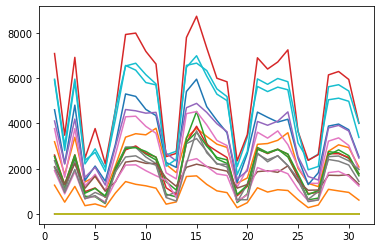

In [52]:
#df = 
kk = cyclists_per_day().loc[(2017,8,)]
for col in kk:
  plt.plot(list(kk.index), kk[col])
  plt.show


In [53]:
url_cyclist = 'https://raw.githubusercontent.com/annassanchez/HY-2021-DataScience/main/week05/Helsingin_pyorailijamaarat.csv'
df_cyclist = pd.read_csv(url_cyclist, sep=';')
df_cyclist = df_cyclist.dropna(axis=0, how="all").dropna(axis=1, how="all")
df_cyclist[["Weekday", "Day", "Month", "Year", "Hour"]] = df_cyclist['Päivämäärä'].str.split(expand=True)
df_cyclist[["Month"]] = df_cyclist[["Month"]].replace({"tammi": "1", "helmi": "2", "maalis": "3", 
                                                        "huhti": "4", "touko": "5", "kesä": "6", 
                                                        "heinä": "7", "elo": "8", "syys": "9", 
                                                        "loka": "10", "marras": "11", "joulu": "12"})
df_cyclist = df_cyclist.astype({"Weekday": object, "Day": int, "Month": int, "Year": int})
test = df_cyclist.groupby(['Year', 'Month', 'Day']).sum()#.get_group()#.size()
test
#pd.DataFrame(test.size().reset_index(name = "Group_Count"))

Auroransilta  Eteläesplanadi  ...  Viikintie   Baana
Year Month Day                                ...                   
2014 1     1             0.0           129.0  ...        0.0   289.0
           2             0.0           526.0  ...        0.0   921.0
           3             0.0           546.0  ...        0.0   912.0
           4             0.0           259.0  ...        0.0   422.0
           5             0.0           230.0  ...        0.0   497.0
...                      ...             ...  ...        ...     ...
2018 3     23          379.0           307.0  ...      199.0   982.0
           24          103.0           170.0  ...       77.0   325.0
           25           99.0           187.0  ...      113.0   399.0
           26          478.0           468.0  ...      233.0  1184.0
           27          440.0           478.0  ...      222.0  1209.0

[1547 rows x 20 columns]

In [54]:
def split_date(df):
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]
    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:, 0]
    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d

def split_date_continues():
    df = pd.read_csv("src/Helsingin_pyorailijamaarat.csv", sep=";")
    df = df.dropna(axis=0, how="all").dropna(axis=1, how="all")
    d = split_date(df)
    df = df.drop("Päivämäärä", axis=1)
    return pd.concat([d, df], axis=1)

def cyclists_per_day():
    df = split_date_continues()
    res = df.groupby(["Year", "Month", "Day"]).sum()
    res = res.drop(["Hour"], axis=1)
    return res

In [55]:
## exercise 05 (best record company)
def best_record_company():
    url_record = 'https://raw.githubusercontent.com/annassanchez/HY-2021-DataScience/main/week05/UK-top40-1964-1-2.tsv'
    company = pd.read_csv(url_record, sep = '\t')
    comps = company.groupby("Publisher")
    wkcomps = comps["WoC"].sum()
    wkcomps = wkcomps.sort_values(ascending=False)
    publ = wkcomps.head(1)
    p=publ.index[0]
    topsingles = company[company["Publisher"] == p]
    #print(wkcomps.index[wkcomps[0]].tolist())
    return topsingles

In [56]:
best_record_company()

,Pos,LW,Title,Artist,Publisher,Peak Pos,WoC
1,2,6,GLAD ALL OVER,THE DAVE CLARK FIVE,COLUMBIA,2,7
3,4,3,YOU WERE MADE FOR ME,FREDDIE AND THE DREAMERS,COLUMBIA,3,9
9,10,8,DON'T TALK TO HIM,CLIFF RICHARD,COLUMBIA,2,9
11,12,11,GERONIMO,THE SHADOWS,COLUMBIA,11,5
15,16,12,YOU'LL NEVER WALK ALONE,GERRY AND THE PACEMAKERS,COLUMBIA,1,13
24,25,25,I (WHO HAVE NOTHING),SHIRLEY BASSEY,COLUMBIA,6,14
39,40,Re,WALKING ALONE,RICHARD ANTHONY,COLUMBIA,37,2


In [57]:
## alternative solution
def best_record_company():
    df = pd.read_csv("src/UK-top40-1964-1-2.tsv", sep="\t")
    df2 = df.groupby("Publisher").sum()
    best_company = df2["WoC"].idxmax()
    return df[df["Publisher"] == best_company]

In [65]:
## exercise 06 (suicide fractions)
def suicide_fractions():
  url = 'https://raw.githubusercontent.com/annassanchez/HY-2021-DataScience/main/week05/who_suicide_statistics.csv'
  df_suicide = pd.read_csv(url, sep = ',')
  df_suicide['suicide_population'] = df_suicide['suicides_no'] / df_suicide['population']
  suicide = df_suicide.groupby(by = 'country')['suicide_population'].mean()#.sum().apply(lambda x: x['suicides_no']/x['population'])
  return suicide

In [59]:
df = suicide_fractions()
print("Shape:", df.shape)
print("Column name:", df.name)
pd.set_option("display.max_rows", None)
print(df)
print(f"{df.isnull().sum()} missing values")

Shape: (141,)
Column name: suicide_population
country
Albania                               0.000035
Anguilla                                   NaN
Antigua and Barbuda                   0.000005
Argentina                             0.000105
Armenia                               0.000033
Aruba                                 0.000076
Australia                             0.000130
Austria                               0.000248
Azerbaijan                            0.000032
Bahamas                               0.000014
Bahrain                               0.000019
Barbados                              0.000028
Belarus                               0.000295
Belgium                               0.000222
Belize                                0.000059
Bermuda                               0.000048
Bolivia                                    NaN
Bosnia and Herzegovina                0.000115
Brazil                                0.000057
British Virgin Islands                     NaN
Brunei

In [60]:
## alternative solution
def suicide_fractions():
    df = pd.read_csv("src/who_suicide_statistics.csv")
    df["Suicide fraction"] = df["suicides_no"] / df["population"]
    result = df.groupby("country").mean()
    return result["Suicide fraction"]

In [70]:
## exercise 07 (suicide weather)
def suicide_weather():
  weather = pd.read_html(io='https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature', 
                          header = [0], index_col = [0])
  weather = weather[0]
  #weather.iloc[:,0] = weather.iloc[:,0].str.replace("\u2212", "-").astype(float)
  suicide = suicide_fractions() 
  suicide_weather = pd.concat([weather, suicide.fillna(0)], axis=1).dropna()
  weather = pd.to_numeric(weather.iloc[:, 0].str.replace("\u2212", "-"))
  #info(suicide, "Suicide fractions")
  #info(temperature, "Temperatures")
  corr = suicide.corr(weather, method="spearman")
  return suicide.shape[0], weather.shape[0], weather.shape[0], corr

In [71]:
suicide_weather()

(141, 191, 191, -0.5537917996739751)

In [ ]:
##another solution
def suicide_fractions():
    df = pd.read_csv("src/who_suicide_statistics.csv")
    df["Suicide fraction"] = df["suicides_no"] / df["population"]
    result = df.groupby("country").mean()
    return result["Suicide fraction"]

def info(df, name):
    print("\n%s" % name)
    print("=" * len(name))
    print("Shape:", df.shape)
    print("dtypes:\n", df.dtypes)
    if isinstance(df, pd.DataFrame):
        print("column names:", df.columns)
    print(df.head())
    
def suicide_weather():
    suicide = suicide_fractions()
    version = list(map(int, pd.__version__.split(".")))   # Get version of Pandas
    # older Pandas versions don't support displayed_only option 
    if version[0] == 0 and version[1] < 23:   
        tables = pd.read_html("src/List_of_countries_by_average_yearly_temperature.html",
                              header=0, index_col=0)
    else:
        tables = pd.read_html("src/List_of_countries_by_average_yearly_temperature.html",
                              header=0, index_col=0, displayed_only=False) 
    temperature = tables[1]    # The first table is a non-displayed one, we don't want that
    temperature = pd.to_numeric(temperature.iloc[:, 0].str.replace("\u2212", "-"))
    #info(suicide, "Suicide fractions")
    #info(temperature, "Temperatures")
    corr = suicide.corr(temperature, method="spearman")
    if version[0] == 0 and version[1] < 23:   # older Pandas versions don't support sort option
        common = pd.concat([suicide, temperature], axis=1, join="inner")
    else:
        common = pd.concat([suicide, temperature], axis=1, join="inner", sort=False)
    return (suicide.shape[0], temperature.shape[0], common.shape[0], corr)

## Time series

In [73]:
wh2 = wh3.copy()
wh2.columns

Index(['Year', 'Month', 'Day', 'Time', 'Time zone', 'Precipitation', 'Snow',
       'Temperature'],
      dtype='object')

In [75]:
## the columns year, month and day are in appropriate form for to_datetime method;
wh2["Date"] = pd.to_datetime(wh2[["Year", "Month", "Day"]])
wh2.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature,Date
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6,2017-01-01
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9,2017-01-02
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5,2017-01-03
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8,2017-01-04
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8,2017-01-05


In [76]:
wh2=wh2.drop(columns=["Year", "Month", "Day"])
wh2.head()

,Time,Time zone,Precipitation,Snow,Temperature,Date
0,00:00,UTC,-1.0,-1.0,0.6,2017-01-01
1,00:00,UTC,4.4,-1.0,-3.9,2017-01-02
2,00:00,UTC,6.6,7.0,-6.5,2017-01-03
3,00:00,UTC,-1.0,13.0,-12.8,2017-01-04
4,00:00,UTC,-1.0,10.0,-17.8,2017-01-05


In [77]:
##converting the date column to index
wh2 = wh2.set_index("Date")
wh2.head()

,Time,Time zone,Precipitation,Snow,Temperature
Date,,,,,
2017-01-01,00:00,UTC,-1.0,-1.0,0.6
2017-01-02,00:00,UTC,4.4,-1.0,-3.9
2017-01-03,00:00,UTC,6.6,7.0,-6.5
2017-01-04,00:00,UTC,-1.0,13.0,-12.8
2017-01-05,00:00,UTC,-1.0,10.0,-17.8


In [78]:
wh2["2017-01-15":"2017-02-03"]

,Time,Time zone,Precipitation,Snow,Temperature
Date,,,,,
2017-01-15,00:00,UTC,-1.0,8.0,-2.8
2017-01-16,00:00,UTC,-1.0,8.0,-4.2
2017-01-17,00:00,UTC,0.2,8.0,-3.5
2017-01-18,00:00,UTC,0.9,8.0,1.1
2017-01-19,00:00,UTC,-1.0,5.0,1.6
2017-01-20,00:00,UTC,0.3,5.0,-0.6
2017-01-21,00:00,UTC,0.4,5.0,-1.8
2017-01-22,00:00,UTC,0.2,5.0,1.0
2017-01-23,00:00,UTC,0.1,6.0,0.1


In [79]:
## date_range -- more complicated sets can be formed:
r=pd.date_range("2017-07-01", "2017-07-31", freq="w-mon")
r

DatetimeIndex(['2017-07-03', '2017-07-10', '2017-07-17', '2017-07-24',
               '2017-07-31'],
              dtype='datetime64[ns]', freq='W-MON')

In [80]:
wh2.index.difference(r)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=360, freq=None)

In [81]:
wh2.loc[r,:]

,Time,Time zone,Precipitation,Snow,Temperature
2017-07-03,00:00,UTC,2.2,-1.0,14.5
2017-07-10,00:00,UTC,-1.0,-1.0,18.0
2017-07-17,00:00,UTC,2.7,-1.0,15.4
2017-07-24,00:00,UTC,-1.0,-1.0,15.7
2017-07-31,00:00,UTC,0.1,-1.0,17.8


In [82]:
## the following finds all the business days (mo-fri) of july:
pd.date_range("2017-07-01", "2017-07-31", freq="b")

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21', '2017-07-24',
               '2017-07-25', '2017-07-26', '2017-07-27', '2017-07-28',
               '2017-07-31'],
              dtype='datetime64[ns]', freq='B')

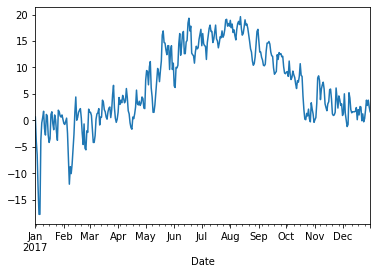

In [83]:
# you can see the values plotting thee temperature
%matplotlib inline
wh2["Temperature"].plot();

In [84]:
## you can make it look smoother by taking averages over a sliding window of 30 days
rolling = wh2.Temperature.rolling(30, center=True)
rolling

Rolling [window=30,center=True,axis=0]

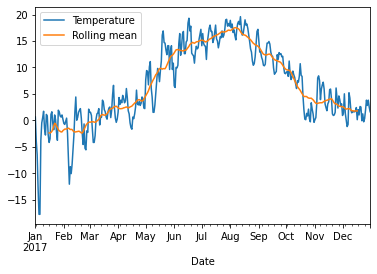

In [85]:
data = pd.DataFrame({"Temperature" : wh2.Temperature, "Rolling mean" : rolling.mean()})
data.plot();

In [86]:
## exercise 08 (bicycle timeseries)
def bicycle_timeseries():
  return 

In [87]:
def bicycle_timeseries():
    url = 'https://raw.githubusercontent.com/annassanchez/HY-2021-DataScience/main/week05/Helsingin_pyorailijamaarat.csv'
    kk = pd.read_csv(url, sep = ';', header = 0)
    kk = kk.dropna(axis=0, how='all')
    kk = kk.dropna(axis=1, how='all')
    kk[["Weekday", "Day", "Month", "Year", "Time"]] = kk['Päivämäärä'].str.split(expand=True)

    kk[["Weekday"]] = kk[["Weekday"]].replace({"ma": "Mon", "ti": "Tue", "ke": "Wed", "to": "Thu", 
        "pe": "Fri", "la": "Sat", "su": "Sun"})
    kk[["Month"]] = kk[["Month"]].replace({"tammi": "1", "helmi": "2", "maalis": "3", "huhti": "4", 
        "touko": "5", "kesä": "6", "heinä": "7", "elo": "8", "syys": "9", "loka": "10", "marras": "11",
        "joulu": "12"})
    kk["Hour"] = kk["Time"].str.split(":", expand=True)[0]#.map(str)
    kk["Minute"] = kk["Time"].str.split(":", expand=True)[1]#.map(str)
    kk['Päivämäärä'] = pd.to_datetime(kk[["Year", "Month", "Day", "Hour", "Minute"]], format = '%Y/%m/%d %H:%M')
    kk = kk.set_index("Päivämäärä")
    kk.drop(["Weekday", "Day", "Month", "Year", "Hour", "Minute", "Time"], axis = 1, inplace=True)
    return kk

In [88]:
print(bicycle_timeseries().shape)
bicycle_timeseries().head()

(37128, 20)


,Auroransilta,Eteläesplanadi,Huopalahti (asema),Kaisaniemi/Eläintarhanlahti,Kaivokatu,Kulosaaren silta et.,Kulosaaren silta po.,Kuusisaarentie,"Käpylä, Pohjoisbaana",Lauttasaaren silta eteläpuoli,Merikannontie,Munkkiniemen silta eteläpuoli,Munkkiniemi silta pohjoispuoli,Heperian puisto/Ooppera,Pitkäsilta itäpuoli,Pitkäsilta länsipuoli,Lauttasaaren silta pohjoispuoli,Ratapihantie,Viikintie,Baana
Päivämäärä,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,NaN,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,3.0,NaN,11.0,NaN,NaN,NaN,8.0
2014-01-01 01:00:00,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,1.0,NaN,8.0,NaN,NaN,NaN,4.0
2014-01-01 02:00:00,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,14.0,NaN,NaN,NaN,11.0
2014-01-01 03:00:00,NaN,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,NaN,7.0,NaN,NaN,NaN,3.0
2014-01-01 04:00:00,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,9.0,NaN,NaN,NaN,4.0


In [ ]:
## alternative solution
def split_date(df):
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]
    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:, 0]
    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d
def bicycle_timeseries():
    df = pd.read_csv("src/Helsingin_pyorailijamaarat.csv", sep=";")
    df = df.dropna(axis=0, how="all").dropna(axis=1, how="all")
    d = split_date(df)
    df["Date"] = pd.to_datetime(d[["Year", "Month", "Day", "Hour"]]) 
    df = df.drop("Päivämäärä", axis=1)
    df = df.set_index("Date")
    return df

In [106]:
## exercise 09 (commute)
def commute():
  url = 'https://raw.githubusercontent.com/annassanchez/HY-2021-DataScience/main/week05/Helsingin_pyorailijamaarat.csv'
  kk = pd.read_csv(url, sep = ';', header = 0)
  kk = kk.dropna(axis=0, how='all')
  kk = kk.dropna(axis=1, how='all')
  kk[["Weekday", "Day", "Month", "Year", "Time"]] = kk['Päivämäärä'].str.split(expand=True)

  kk[["Weekday"]] = kk[["Weekday"]].replace({"ma": "Mon", "ti": "Tue", "ke": "Wed", "to": "Thu", 
  "pe": "Fri", "la": "Sat", "su": "Sun"})
  kk[["Month"]] = kk[["Month"]].replace({"tammi": "1", "helmi": "2", "maalis": "3", "huhti": "4", 
  "touko": "5", "kesä": "6", "heinä": "7", "elo": "8", "syys": "9", "loka": "10", "marras": "11",
  "joulu": "12"})
  kk["Hour"] = kk["Time"].str.split(":", expand=True)[0]#.map(str)
  kk["Minute"] = kk["Time"].str.split(":", expand=True)[1]#.map(str)
  kk['Päivämäärä'] = pd.to_datetime(kk[["Year", "Month", "Day", "Hour", "Minute"]], format = '%Y/%m/%d %H:%M')
  kk = kk.set_index("Päivämäärä")  
  kk[["Weekday"]] = kk[["Weekday"]].replace({"Mon":1, "Tue":2, "Wed":3, "Thu":4, "Fri":5, 
                                              "Sat":6, "Sun":7})
  bicycle = kk["2017-08-01": "2017-08-31"].groupby("Weekday").sum()
  return bicycle

In [108]:
commute()#.head()

,Auroransilta,Eteläesplanadi,Huopalahti (asema),Kaisaniemi/Eläintarhanlahti,Kaivokatu,Kulosaaren silta et.,Kulosaaren silta po.,Kuusisaarentie,"Käpylä, Pohjoisbaana",Lauttasaaren silta eteläpuoli,Merikannontie,Munkkiniemen silta eteläpuoli,Munkkiniemi silta pohjoispuoli,Heperian puisto/Ooppera,Pitkäsilta itäpuoli,Pitkäsilta länsipuoli,Lauttasaaren silta pohjoispuoli,Ratapihantie,Viikintie,Baana
Weekday,,,,,,,,,,,,,,,,,,,,
1,0.0,11353.0,11083.0,10644.0,0.0,7.0,13879.0,10052.0,0.0,21337.0,16870.0,4820.0,10551.0,25439.0,15555.0,7057.0,7646.0,9256.0,0.0,22768.0
2,0.0,16529.0,15415.0,14636.0,0.0,8.0,19296.0,13278.0,0.0,29983.0,24101.0,6365.0,14569.0,36458.0,21440.0,10181.0,10269.0,13186.0,0.0,30598.0
3,0.0,14890.0,12509.0,12734.0,0.0,6.0,16576.0,11496.0,0.0,25836.0,19946.0,5156.0,12626.0,31469.0,19019.0,9306.0,8772.0,11138.0,0.0,27437.0
4,0.0,15630.0,11729.0,12478.0,0.0,10.0,15911.0,10600.0,0.0,25800.0,20272.0,5123.0,12284.0,31364.0,19616.0,9875.0,8556.0,10605.0,0.0,27489.0
5,0.0,10155.0,7043.0,7626.0,0.0,3.0,9913.0,6543.0,0.0,16057.0,11879.0,3071.0,7576.0,18573.0,12271.0,6678.0,5158.0,6462.0,0.0,16972.0
6,0.0,6547.0,2754.0,4004.0,0.0,6.0,6108.0,2912.0,0.0,9949.0,7080.0,1425.0,4259.0,11022.0,7944.0,5439.0,3422.0,2697.0,0.0,8523.0
7,0.0,5628.0,2789.0,3757.0,0.0,14.0,5909.0,4037.0,0.0,10854.0,8001.0,1724.0,4165.0,11018.0,7017.0,4592.0,2699.0,2284.0,0.0,9160.0


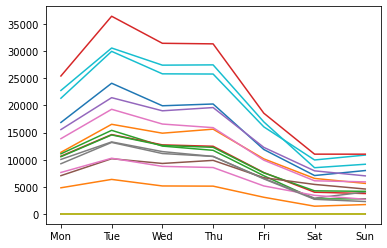

In [110]:
data = commute()
#print(data)
plt.plot(data)
weekdays="x mon tue wed thu fri sat sun".title().split()
plt.gca().set_xticklabels(weekdays)
plt.show()

In [ ]:
## alternative solution

days = dict(zip("ma ti ke to pe la su".split(), "Mon Tue Wed Thu Fri Sat Sun".split()))
months = dict(zip("tammi helmi maalis huhti touko kesä heinä elo syys loka marras joulu".split(), range(1, 13)))
 
def split_date(df):
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]
    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:, 0]
    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d

def bicycle_timeseries():
    df = pd.read_csv("src/Helsingin_pyorailijamaarat.csv", sep=";")
    df = df.dropna(axis=0, how="all").dropna(axis=1, how="all")
    d = split_date(df)
    df["Date"] = pd.to_datetime(d[["Year", "Month", "Day", "Hour"]]) 
    df = df.drop("Päivämäärä", axis=1)
    df = df.set_index("Date")
    return df

def commute():
    df = bicycle_timeseries()
    df = df["2017-8-1":"2017-8-31"]
    df = df.groupby(pd.datetime.weekday).sum()
    print(df)
    weekdays = list(range(1, 8))
    df["Weekday"] = weekdays
    df = df.set_index("Weekday")
    return df

def main():
    df = commute()
    pd.set_option("display.max_rows", None)
    print(df)
    df.plot(title="Number of cyclists in Helsinki August 2017")
    weekdays = "x mon tue wed thu fri sat sun".title().split()
    plt.gca().set_xticklabels(weekdays)
    plt.show()
    print(df.values.sum())

# Linear regression

## Linear regression

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn   # This imports the scikit-learn library

In [112]:
## the distribution y = 2*x + 1, with normally distributed errors
np.random.seed(0)
n=20   # Number of data points
x=np.linspace(0, 10, n)
y=x*2 + 1 + 1*np.random.randn(n) # Standard deviation 1
print(x)
print(y)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[ 2.76405235  2.45278879  4.08400114  6.39878794  7.07808431  5.28588001
  8.26587789  8.21706384  9.31783378 10.88428271 11.67035936 14.03322088
 14.39261667 14.80588554 16.18070534 17.12314801 19.33618434 18.68957858
 20.26043612 20.14590426]


In [113]:
## importing the linear regression class
from sklearn.linear_model import LinearRegression

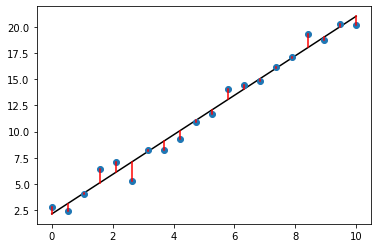

In [114]:
## fitting a line through the data points
model=LinearRegression(fit_intercept=True)
model.fit(x[:,np.newaxis], y)
xfit=np.linspace(0,10,100)
yfit=model.predict(xfit[:, np.newaxis])
plt.plot(xfit,yfit, color="black")
plt.plot(x,y, 'o')
# The following will draw as many line segments as there are columns in matrices x and y
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="red");

In [115]:
## the linear regression minimizes the sum squared of errors -- the length of the red line segments in the above plot
print("Parameters:", model.coef_, model.intercept_)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

Parameters: [1.88627741] 2.1379475205341354
Coefficient: 1.8862774144823005
Intercept: 2.1379475205341354


### Multiple features

In [116]:
## multiple explanatory variables -- complex regression
sample1=np.array([1,2,3])   # The three explanatory variables have values 1, 2, and 3, respectively
sample2=np.array([4,5,6])   # Another example of values of explanatory variables
sample3=np.array([7,8,10])   # ...
y=np.array([15,39,66]) + np.random.randn(3)   # For values 1,2, and 3 of explanatory variables, the value y=15 was observed, and so on.

In [117]:
##fit a linear model to these points
model2=LinearRegression(fit_intercept=False)
x=np.vstack([sample1,sample2,sample3])
model2.fit(x, y)
model2.coef_, model2.intercept_

(array([5.69493795e+00, 3.36972233e+00, 4.20919214e-03]), 0.0)

In [118]:
## print the components involved
b=model2.coef_[:, np.newaxis]
print("x:\n", x)
print("b:\n", b)
print("y:\n", y[:, np.newaxis])
print("product:\n", np.matmul(x, b))

x:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]
b:
 [[5.69493795e+00]
 [3.36972233e+00]
 [4.20919214e-03]]
y:
 [[12.44701018]
 [39.6536186 ]
 [66.8644362 ]]
product:
 [[12.44701018]
 [39.6536186 ]
 [66.8644362 ]]


### polynomial regression

Coefficients: [-36.65414588 -20.17228669   0.15359003]
Intercept: -167.16046606444797


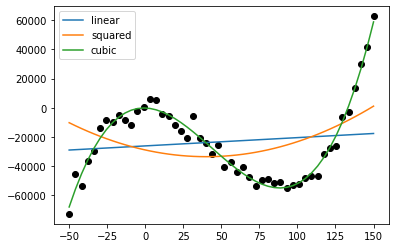

In [119]:
## one can fit a polynomial curve to data points using linear regression
## you need to add explanatory variables to the model
## you need to add to more functions x^2 and x^3 in order to eexplain the initial one
## the linear regression will get the coefficients for x, x^2 and x^3
x=np.linspace(-50,150,50)
y=0.15*x**3 - 20*x**2 + 5*x - 4 + 5000*np.random.randn(50)
plt.scatter(x, y, color="black")
model_linear=LinearRegression(fit_intercept=True)
model_squared=LinearRegression(fit_intercept=True)
model_cubic=LinearRegression(fit_intercept=True)
x2=x**2
x3=x**3
model_linear.fit(np.vstack([x]).T, y)
model_squared.fit(np.vstack([x,x2]).T, y)
model_cubic.fit(np.vstack([x,x2,x3]).T, y)
xf=np.linspace(-50,150, 50)
yf_linear=model_linear.predict(np.vstack([x]).T)
yf_squared=model_squared.predict(np.vstack([x,x2]).T)
yf_cubic=model_cubic.predict(np.vstack([x,x2,x3]).T)
plt.plot(xf,yf_linear, label="linear")
plt.plot(xf,yf_squared, label="squared")
plt.plot(xf,yf_cubic, label="cubic")
plt.legend()
print("Coefficients:", model_cubic.coef_)
print("Intercept:", model_cubic.intercept_)

In [134]:
## exercise 10 (linear regression)
def fit_line(x, y):
  model_linear=LinearRegression(fit_intercept=True)
  model_linear.fit(np.vstack([x]).T, y)
  yf_linear = model_linear.predict(np.vstack([x]).T)
  slope =  model_linear.coef_[0]#.map(float)
  intercept = model_linear.intercept_
  return (slope, intercept)

Slope: 0.9999999999999999
Intercept: 7.105427357601002e-15


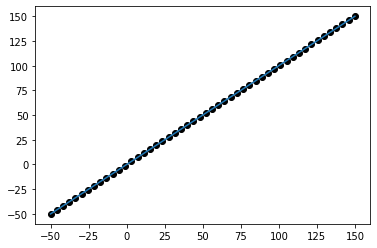

In [138]:
x = np.linspace(-50,150,50)
y = x    
a, b = fit_line(x, y)
print("Slope:", a)
print("Intercept:", b)
plt.scatter(x, y, color="black")
model_linear=LinearRegression(fit_intercept=True)
model_linear.fit(np.vstack([x]).T, y)
xf = x
yf = model_linear.predict(np.vstack([x]).T)
plt.plot(xf,yf, label="linear")
plt.show()

Slope: 0.9999999999999998
Intercept: 1.166666666666667


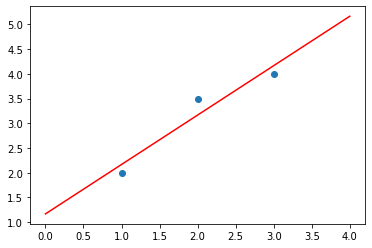

In [139]:
## alternative solution

def fit_line(x, y):
    reg = LinearRegression()
    X = x.reshape((-1, 1))
    reg.fit(X, y)
    return reg.coef_[0], reg.intercept_   


x = np.array([1, 2, 3])
y = np.array([1, 2.5, 3]) + 1
slope, intercept = fit_line(x, y)
print("Slope:", slope)
print("Intercept:", intercept)
plt.scatter(x, y)
x1 = np.linspace(min(x)-1, max(x)+1, 10)
plt.plot(x1, x1*slope + intercept, 'red')
plt.show()

In [157]:
##exercise 11 (mystery data)
def mystery_data():
  url = 'https://raw.githubusercontent.com/annassanchez/HY-2021-DataScience/main/week05/mystery_data.tsv'
  data = pd.read_csv(url, sep = '\t')
  model_linear = LinearRegression(fit_intercept=False)
  X = data[['X1', 'X2', 'X3', 'X4', 'X5']]#.values.reshape(5000,1)
  y = data[['Y']]
  model_linear.fit(np.vstack([X]), y)
  return model_linear.coef_

In [158]:
mystery_data()

array([[ 3.00000000e+00, -1.00000000e+00,  7.00000000e+00,
        -5.32907052e-15, -2.00000000e+01]])

In [161]:
coefficients = mystery_data()
print("Coefficient of X1 is: ", coefficients[0][0])
print("Coefficient of X2 is: ", coefficients[0][1])
print("Coefficient of X3 is: ", coefficients[0][2])
print("Coefficient of X4 is: ", coefficients[0][3])
print("Coefficient of X5 is: ", coefficients[0][4])

Coefficient of X1 is:  3.0
Coefficient of X2 is:  -0.9999999999999973
Coefficient of X3 is:  6.999999999999991
Coefficient of X4 is:  -5.329070518200751e-15
Coefficient of X5 is:  -19.999999999999996


In [ ]:
## alternative solution
def mystery_data():
    df = pd.read_csv("src/mystery_data.tsv", sep="\t")
    X = df.loc[:, "X1":"X5"]
    y = df.Y
    reg = LinearRegression(fit_intercept=False)
    reg.fit(X, y)
    return reg.coef_

coefficients = mystery_data()
for i, c in enumerate(coefficients):
    print(f"Coefficient of X{i+1} is {c:.4f}")